## Testing of maintenance rates

From experimental data we have produced a set of maintenance rate estimates for each oxygen concentration and each possible path through the ETS of Av. While assuming the lowest maintenance rate would be biologically relevant we will test each maintenance rate with an experimentally derived substrate uptake rate and determine how accurate it can predict growth. Data is from Khula and Oelze 1988 and was extracted using [WebplotDigitizer](https://automeris.io/WebPlotDigitizer).

In [2]:
import cobra.test
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import numpy as np
import seaborn as sns
import os
import math
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.io import save_json_model


In [4]:
#Load data from Fig 4 of Khula and Oelze 

Fig4_data = pd.read_csv("../Data/Experimental_Data/Khula_Oelze_1988_Figure_4.csv")
print(len(Fig4_data))
Fig4_data.head()

36


,Oxygen_conc,Growth_rate,Sucrose_uptake_p,Sucrose_uptake_gcdw
0,192,0.05,11.63,8.81
1,192,0.07,13.06,9.89
2,192,0.10,14.85,11.25
3,192,0.16,16.07,12.18
4,192,0.17,16.48,12.48


In [5]:
#load ATPM predictions
ATPM_pred = pd.read_csv("../Data/Maintenance_rates/Maintenance_rates_pred.csv", index_col=0)
ATPM_pred.rename({'O2_concentration': 'Oxygen_conc', 'ATPM_bound_value': 'ATPM_pred'}, axis=1, inplace=True) 
print(len(ATPM_pred))
ATPM_pred.head()



40


,ETS_path,Oxygen_conc,group,ATPM_pred
0,NII_BD_F,12,NII_BD_F_12,16.258129
1,NII_BD_F,48,NII_BD_F_48,78.789395
2,NII_BD_F,108,NII_BD_F_108,110.805403
3,NII_BD_F,144,NII_BD_F_144,125.062531
4,NII_BD_F,192,NII_BD_F_192,143.071536


In [6]:
#Merge ATPM predictions and experimental data 

ATPM_pred_merge = pd.merge(left=ATPM_pred, right=Fig4_data, left_on='Oxygen_conc', right_on='Oxygen_conc')
ATPM_pred_merge.to_csv("../Data/Maintenance_rates/ATPM_pred_merge.csv")
ATPM_pred_merge.head(50)

,ETS_path,Oxygen_conc,group,ATPM_pred,Growth_rate,Sucrose_uptake_p,Sucrose_uptake_gcdw
0,NII_BD_F,12,NII_BD_F_12,16.258129,0.06,2.65,2.01
1,NII_BD_F,12,NII_BD_F_12,16.258129,0.07,2.96,2.24
2,NII_BD_F,12,NII_BD_F_12,16.258129,0.10,2.96,2.24
3,NII_BD_F,12,NII_BD_F_12,16.258129,0.12,3.16,2.40
4,NII_BD_F,12,NII_BD_F_12,16.258129,0.18,5.00,3.79
5,NII_BD_F,12,NII_BD_F_12,16.258129,0.26,6.48,4.91
6,NII_BD_F,12,NII_BD_F_12,16.258129,0.27,7.24,5.49
7,NII_BD_F,12,NII_BD_F_12,16.258129,0.28,6.73,5.10
8,NII_BD_R,12,NII_BD_R_12,16.258129,0.06,2.65,2.01
9,NII_BD_R,12,NII_BD_R_12,16.258129,0.07,2.96,2.24


In [7]:
#reaction ids not in pathway then "name" of pathway
NII_BD_F = ["NADH6", "CYOO2pp", "RNF", "NII_BD_F"]
NII_CO_F = ["NADH6", "CYTBDpp", "RNF", "NII_CO_F"]
NII_BD_R = ["NADH6", "CYOO2pp", "FIX", "NII_BD_R"]
NII_CO_R = ["NADH6", "CYTBDpp", "FIX", "NII_CO_R"]
NI_BD_F = ["NADH5", "CYOO2pp", "RNF", "NI_BD_F"]
NI_CO_F = ["NADH5", "CYTBDpp", "RNF", "NI_CO_F"] 
NI_BD_R = ["NADH5", "CYOO2pp", "FIX", "NI_BD_R"]
NI_CO_R= ["NADH5", "CYTBDpp", "FIX", "NI_CO_R"]

all_paths = [NII_BD_F,
                NII_CO_F, 
                NII_BD_R,
                NII_CO_R,
                NI_BD_F,
                NI_CO_F,
                NI_BD_R,
                NI_CO_R]

In [9]:
def metabolite_flux_balance(metabolite, solution):
    """
    Return a vector of reaction fluxes scaled by the stoichiometric coefficient.

    Parameters
    ----------
    metabolite : cobra.Metabolite
        The metabolite whose fluxes are to be investigated.
    solution : cobra.Solution
        Solution with flux values.

    Returns
    -------
    pandas.Series
        A vector with fluxes of reactions that consume or produce the given
        metabolite scaled by the corresponding stoichiometric coefficients. The
        reaction identifiers are given by the index.
    """
    rxn_ids = list()
    rxn_sub = list()
    adj_flux = list()
    for rxn in metabolite.reactions:
        coef = rxn.get_coefficient(metabolite)
        rxn_ids.append(rxn.id)
        rxn_sub.append(rxn.subsystem)
        adj_flux.append(coef * solution.fluxes[rxn.id])
    return pd.DataFrame({'Rxn_id': rxn_ids, 'Subsystem': rxn_sub, 'Adjusted_Flux': adj_flux})



# Two functions that will pull the total ATP produced and the ratio of ATPM/Total ATP from the above function
def ATP_total(df):
    positive_num = df[(df.Adjusted_Flux > 0)]
    ATP_total = positive_num['Adjusted_Flux'].sum()
    
    return ATP_total

def ATP_ratio(df, ATP_total):
    ATPM = df.loc[df['Rxn_id'] == 'ATPM', 'Adjusted_Flux'].values[0]
    ATPM_ratio = (ATPM * -1)/ATP_total
    
    return ATPM_ratio

def growth_yeild(u_exp, u_pred, uptake_exp):
    growth_yeild_exp = u_exp / (uptake_exp / 1000)
    growth_yeild_pred = u_pred / (uptake_exp / 1000)
    
    return growth_yeild_exp, growth_yeild_pred


    
    


In [10]:
ATPM_pred_final = ATPM_pred_merge.sort_values(by=['ETS_path', 'Oxygen_conc'],ignore_index=True)
ATPM_pred_final.head(50)

,ETS_path,Oxygen_conc,group,ATPM_pred,Growth_rate,Sucrose_uptake_p,Sucrose_uptake_gcdw
0,NII_BD_F,12,NII_BD_F_12,16.258129,0.06,2.65,2.01
1,NII_BD_F,12,NII_BD_F_12,16.258129,0.07,2.96,2.24
2,NII_BD_F,12,NII_BD_F_12,16.258129,0.10,2.96,2.24
3,NII_BD_F,12,NII_BD_F_12,16.258129,0.12,3.16,2.40
4,NII_BD_F,12,NII_BD_F_12,16.258129,0.18,5.00,3.79
5,NII_BD_F,12,NII_BD_F_12,16.258129,0.26,6.48,4.91
6,NII_BD_F,12,NII_BD_F_12,16.258129,0.27,7.24,5.49
7,NII_BD_F,12,NII_BD_F_12,16.258129,0.28,6.73,5.10
8,NII_BD_F,48,NII_BD_F_48,78.789395,0.05,7.35,5.57
9,NII_BD_F,48,NII_BD_F_48,78.789395,0.06,6.38,4.83


In [29]:

ATPM_pred_final = ATPM_pred_merge.sort_values(by=['ETS_path', 'Oxygen_conc'],ignore_index=True)

def growth_rate_prediction(path_to_model, all_paths):
    suc_uptake = ATPM_pred_final['Sucrose_uptake_gcdw'].tolist()
    suc_uptake_it = []
    ATPM_flux = ATPM_pred_final['ATPM_pred'].tolist()
    ATPM_flux_it = []
    ETS_path = ATPM_pred_final['ETS_path'].tolist()
    ETS_path_it = []
    growth_rate_exp = ATPM_pred_final['Growth_rate'].tolist()
    growth_rate_exp_it = []
    o2_conc = ATPM_pred_final['Oxygen_conc'].tolist()
    o2_conc_it = []
    
    Growth_rate_pred = []
    Oxygen_consumption_pred = []
    ATP_production = []
    ATPM_ATP_prect = []
    growth_yeild_suc_pred = []
    growth_yeild_suc_exp = []
    growth_yeild_o2_pred = []
    growth_yeild_o2_exp = []
    
    for single_path in all_paths:
        
        for (i, j, k, l, m) in zip(ETS_path, suc_uptake, ATPM_flux, growth_rate_exp, o2_conc ):
        
            if i == single_path[3]:
            
                model = cobra.io.load_json_model(path_to_model)

                # Make sure glucose is set to zero
                model.reactions.get_by_id("EX_glc__D_e").lower_bound = 0
                model.reactions.get_by_id("EX_glc__D_e").upper_bound = 0

                # Make sure model is diazotrophic
                model.reactions.get_by_id("EX_nh4_e").lower_bound = 0
                model.reactions.get_by_id("EX_nh4_e").upper_bound = 0

                # set the flux to zero of corresponding reactions in pathway of interest
                model.reactions.get_by_id(single_path[0]).upper_bound = 0
                model.reactions.get_by_id(single_path[0]).lower_bound = 0

                model.reactions.get_by_id(single_path[1]).upper_bound = 0
                model.reactions.get_by_id(single_path[1]).lower_bound = 0

                model.reactions.get_by_id(single_path[2]).upper_bound = 0
                model.reactions.get_by_id(single_path[2]).lower_bound = 0

                # Set sucrose uptake to maintenance coefficient
                model.reactions.get_by_id("EX_sucr_e").lower_bound = -j
                model.reactions.get_by_id("EX_sucr_e").upper_bound = -j

                # Set ATPM to theoretical derived
                model.reactions.get_by_id("ATPM").upper_bound = 1000
                model.reactions.get_by_id("ATPM").lower_bound = k

                # solve the model

                solution = model.optimize()

                Growth_rate_pred.append(solution.objective_value)
                
                # append variables (copying output to df gave mixed reults so this is the way that works for me)
                growth_rate_exp_it.append(l)
                suc_uptake_it.append(j)
                ATPM_flux_it.append(k)
                ETS_path_it.append(i)
                o2_conc_it.append(m)
                
                # append outputs
                Oxygen_consumption_pred.append(solution.fluxes["O2tpp"])
                atp_total_df = metabolite_flux_balance(model.metabolites.atp_c, solution)
                atp_total_prod = ATP_total(atp_total_df)
                ATP_production.append(atp_total_prod)
                ATPM_ATP_prect.append(ATP_ratio(atp_total_df, atp_total_prod))
                growth_yeild_suc_pred.append(growth_yeild(l, solution.objective_value, j)[1])
                growth_yeild_suc_exp.append(growth_yeild(l, solution.objective_value, j)[0])
                growth_yeild_o2_pred.append(growth_yeild(l, solution.objective_value, solution.fluxes["O2tpp"])[1])
                growth_yeild_o2_exp.append(growth_yeild(l, solution.objective_value, solution.fluxes["O2tpp"])[0])
                #print("growth rate {} for path {} at {} sucrose uptake and {} ATPM ...".format(solution.objective_value, single_path[3], j, k, ))
            
            else:
            
                pass
            
        print("Calculated growth rates for path {} ".format(single_path[3]))  
        
    # create dict of all variables and iterations and turn into df   
    dict = {'Sucrose_uptake_gcdw':suc_uptake_it, 'O2_conc': o2_conc_it, 
            'ATPM_pred': ATPM_flux_it,
            'ETS_path': ETS_path_it,
            'Growth_rate_exp': growth_rate_exp_it,
            'Growth_rate_pred': Growth_rate_pred, 'Oxygen_consumption_pred': Oxygen_consumption_pred, 
            'ATP_production': ATP_production, 'ATPM_ATP_prect': ATPM_ATP_prect,
            'growth_yeild_suc_pred': growth_yeild_suc_pred, 'growth_yeild_suc_exp': growth_yeild_suc_exp,
            'growth_yeild_o2_pred': growth_yeild_o2_pred, 'growth_yeild_o2_exp': growth_yeild_o2_exp } 
    
    ATPM_pred_final_test = pd.DataFrame(dict)
    
    ATPM_pred_final_test.to_csv("../Data/Maintenance_rates/ATPM_pred_final_df.csv")
    
    

   


In [30]:
model = cobra.io.load_json_model('../Data/Models/iAA1300.json')

# Make sure glucose is set to zero
model.reactions.get_by_id("EX_glc__D_e").lower_bound = 0
model.reactions.get_by_id("EX_glc__D_e").upper_bound = 0

# Make sure model is diazotrophic
model.reactions.get_by_id("EX_nh4_e").lower_bound = 0
model.reactions.get_by_id("EX_nh4_e").upper_bound = 0

# set the flux to zero of corresponding reactions in pathway of interest
model.reactions.get_by_id("NADH5").upper_bound = 0
model.reactions.get_by_id("NADH5").lower_bound = 0

model.reactions.get_by_id("CYTBDpp").upper_bound = 0
model.reactions.get_by_id("CYTBDpp").lower_bound = 0

model.reactions.get_by_id("RNF").upper_bound = 0
model.reactions.get_by_id("RNF").lower_bound = 0

# Set sucrose uptake to maintenance coefficient
model.reactions.get_by_id("EX_sucr_e").lower_bound = -13.95
model.reactions.get_by_id("EX_sucr_e").upper_bound = -13.95

# Set ATPM to theoretical derived
model.reactions.get_by_id("ATPM").upper_bound = 1000
model.reactions.get_by_id("ATPM").lower_bound = 446.72
                                 
solution = model.optimize()

print(solution.objective_value)
atp_total_df = metabolite_flux_balance(model.metabolites.atp_c, solution)
atp_total_prod = ATP_total(atp_total_df)
print(atp_total_prod)
print(ATP_ratio(atp_total_df, atp_total_prod))

0.8723462112884255
646.5042925298619
0.6909776240648334


In [31]:
 growth_rate_prediction("../Data/Models/iAA1300.json", all_paths)

#its running all of the single_paths for each o2 before going to the next -maybe sort the merge file before running script 

Calculated growth rates for path NII_BD_F 
Calculated growth rates for path NII_CO_F 
Calculated growth rates for path NII_BD_R 
Calculated growth rates for path NII_CO_R 
Calculated growth rates for path NI_BD_F 
Calculated growth rates for path NI_CO_F 
Calculated growth rates for path NI_BD_R 
Calculated growth rates for path NI_CO_R 


In [118]:
suc_uptake = ATPM_pred_final['ATPM_pred'].tolist()
print(len(suc_uptake))


288


In [3]:
growth_compare = pd.read_csv("../Data/Maintenance_rates/ATPM_pred_final_df.csv", index_col = 0)
growth_compare.head()


,Sucrose_uptake_gcdw,O2_conc,ATPM_pred,ETS_path,Growth_rate_exp,Growth_rate_pred,Oxygen_consumption_pred,ATP_production,ATPM_ATP_prect,growth_yeild_suc_pred,growth_yeild_suc_exp,growth_yeild_o2_pred,growth_yeild_o2_exp
0,2.01,12,16.258129,NII_BD_F,0.06,0.094395,19.432741,39.352471,0.413141,46.962927,29.850746,4.857549,3.087573
1,2.24,12,16.258129,NII_BD_F,0.07,0.112532,21.292168,43.321077,0.375294,50.237446,31.250000,5.285130,3.287594
2,2.24,12,16.258129,NII_BD_F,0.10,0.112532,21.292168,43.321077,0.375294,50.237446,44.642857,5.285130,4.696563
3,2.40,12,16.258129,NII_BD_F,0.12,0.125149,22.585683,45.671348,0.355981,52.145209,50.000000,5.541055,5.313100
4,3.79,12,16.258129,NII_BD_F,0.18,0.234755,33.823092,69.296014,0.234619,61.940741,47.493404,6.940684,5.321808


In [4]:
# split ETS_path into ETC and F or R
ETS_path_new = growth_compare['ETS_path'].str.rsplit("_", n =1, expand = True)
growth_compare['ETS_path_1'] = ETS_path_new[0]
growth_compare['ETS_path_2'] = ETS_path_new[1]
growth_compare.head()


,Sucrose_uptake_gcdw,O2_conc,ATPM_pred,ETS_path,Growth_rate_exp,Growth_rate_pred,Oxygen_consumption_pred,ATP_production,ATPM_ATP_prect,growth_yeild_suc_pred,growth_yeild_suc_exp,growth_yeild_o2_pred,growth_yeild_o2_exp,ETS_path_1,ETS_path_2
0,2.01,12,16.258129,NII_BD_F,0.06,0.094395,19.432741,39.352471,0.413141,46.962927,29.850746,4.857549,3.087573,NII_BD,F
1,2.24,12,16.258129,NII_BD_F,0.07,0.112532,21.292168,43.321077,0.375294,50.237446,31.250000,5.285130,3.287594,NII_BD,F
2,2.24,12,16.258129,NII_BD_F,0.10,0.112532,21.292168,43.321077,0.375294,50.237446,44.642857,5.285130,4.696563,NII_BD,F
3,2.40,12,16.258129,NII_BD_F,0.12,0.125149,22.585683,45.671348,0.355981,52.145209,50.000000,5.541055,5.313100,NII_BD,F
4,3.79,12,16.258129,NII_BD_F,0.18,0.234755,33.823092,69.296014,0.234619,61.940741,47.493404,6.940684,5.321808,NII_BD,F


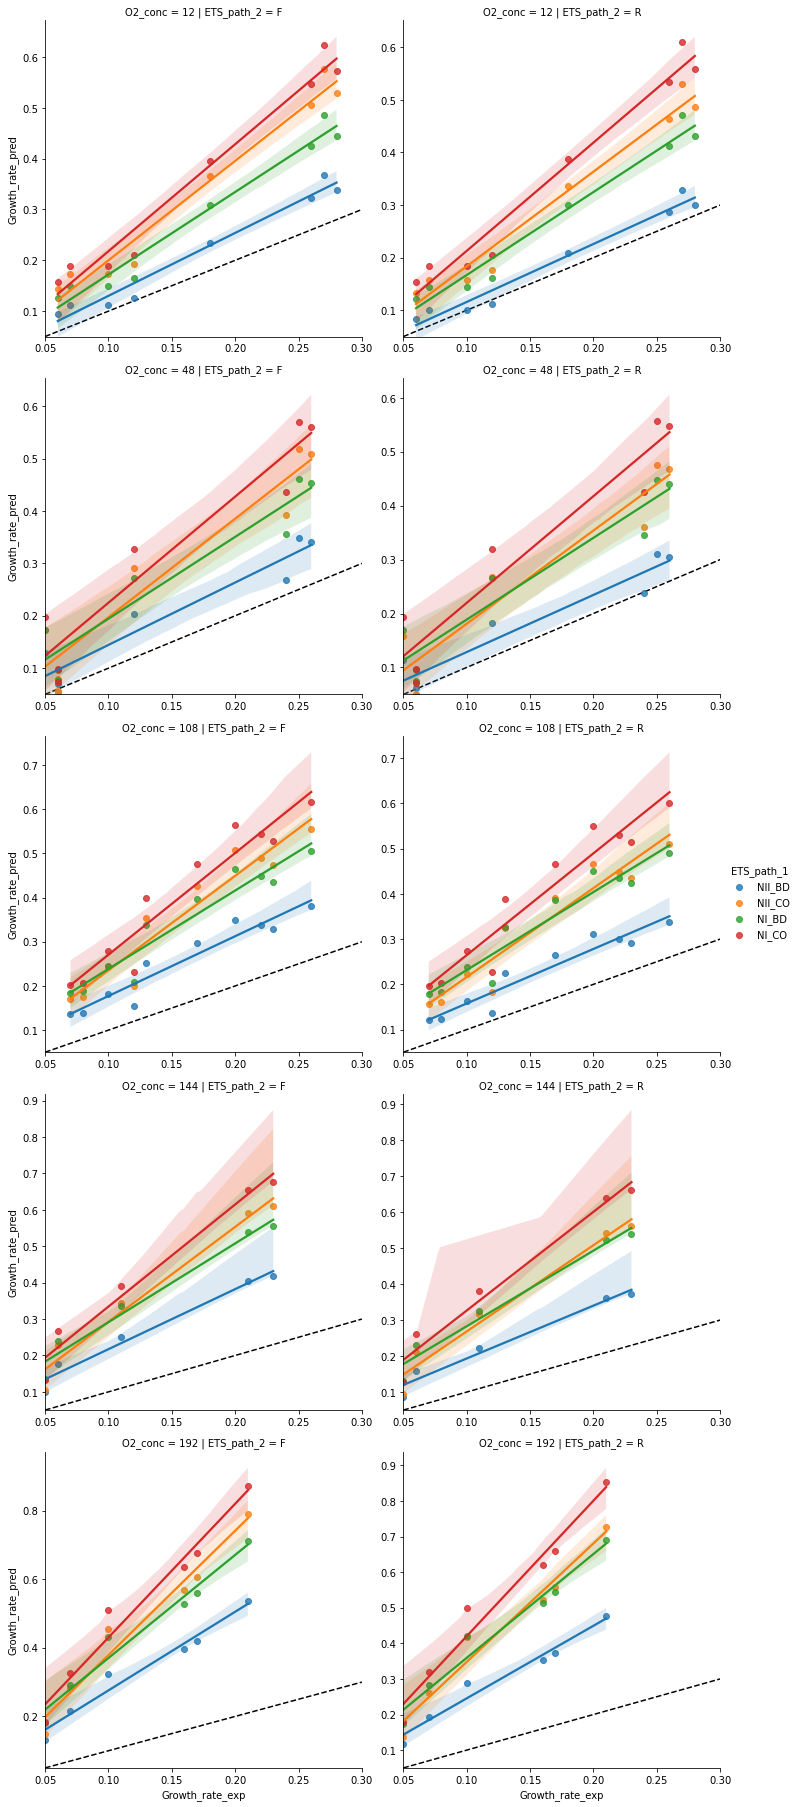

In [55]:
g =sns.lmplot(data = growth_compare, x = 'Growth_rate_exp', y ='Growth_rate_pred', row = "O2_conc", col = 'ETS_path_2', hue = 'ETS_path_1',
              sharey = False, sharex = False)
for ax in g.axes.flat:
    ax.axline((0, 0), slope=1, ls="--", c = 'k', zorder=0)
g.set(ylim=(0.05, None), xlim =(0.05, 0.3))
g.savefig('../Outputs/Maintenance_rates/GR_compare_O2_FR.tiff', dpi = 60)

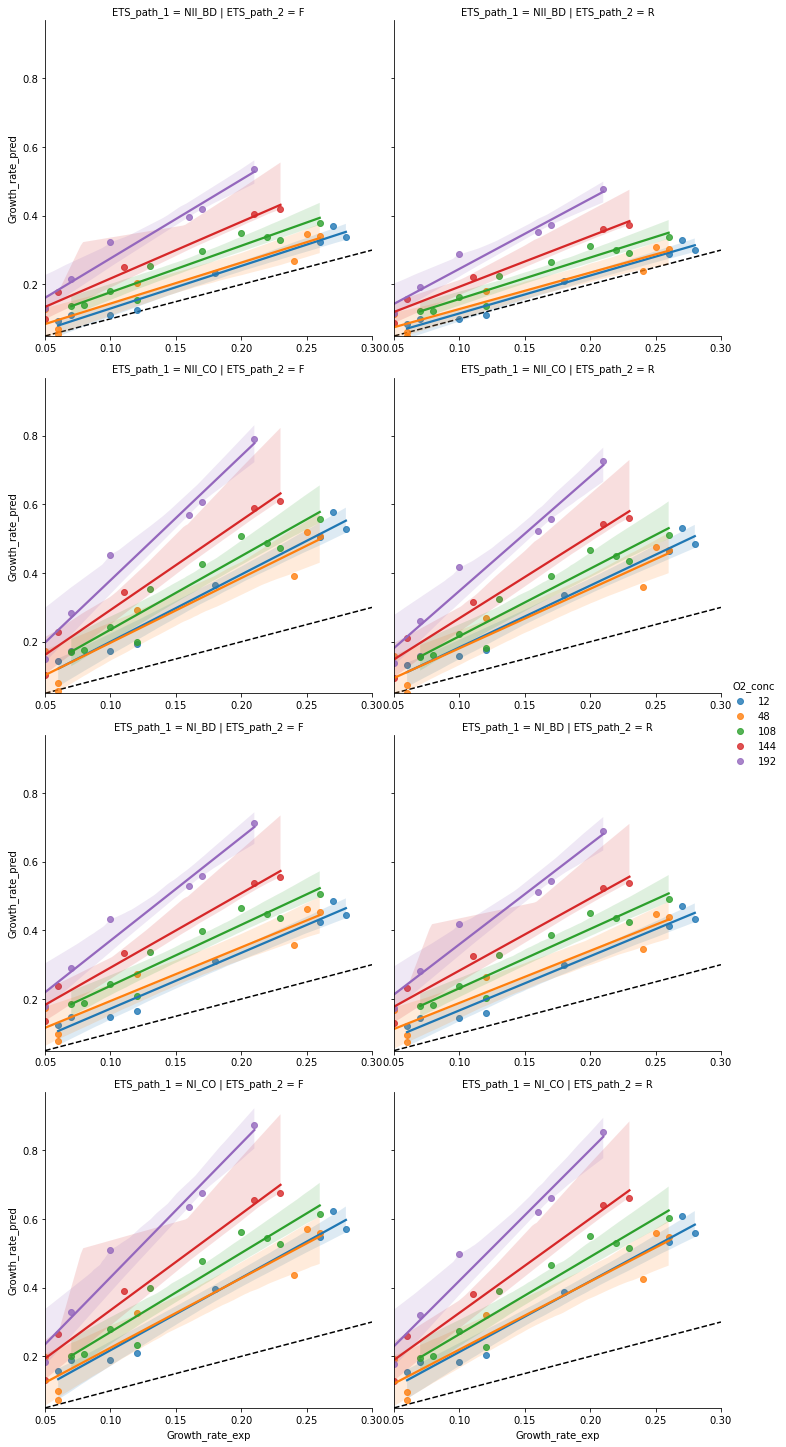

In [56]:
g =sns.lmplot(data = growth_compare, x = 'Growth_rate_exp', y ='Growth_rate_pred', row = 'ETS_path_1', col = 'ETS_path_2', hue = "O2_conc",
              sharey = True, sharex = False)
for ax in g.axes.flat:
    ax.axline((0, 0), slope=1, ls="--", c = 'k', zorder=0)
g.set(ylim=(0.05, None), xlim =(0.05, 0.3))
g.savefig('../Outputs/Maintenance_rates/GR_compare_ETS_FR.tiff', dpi = 60)

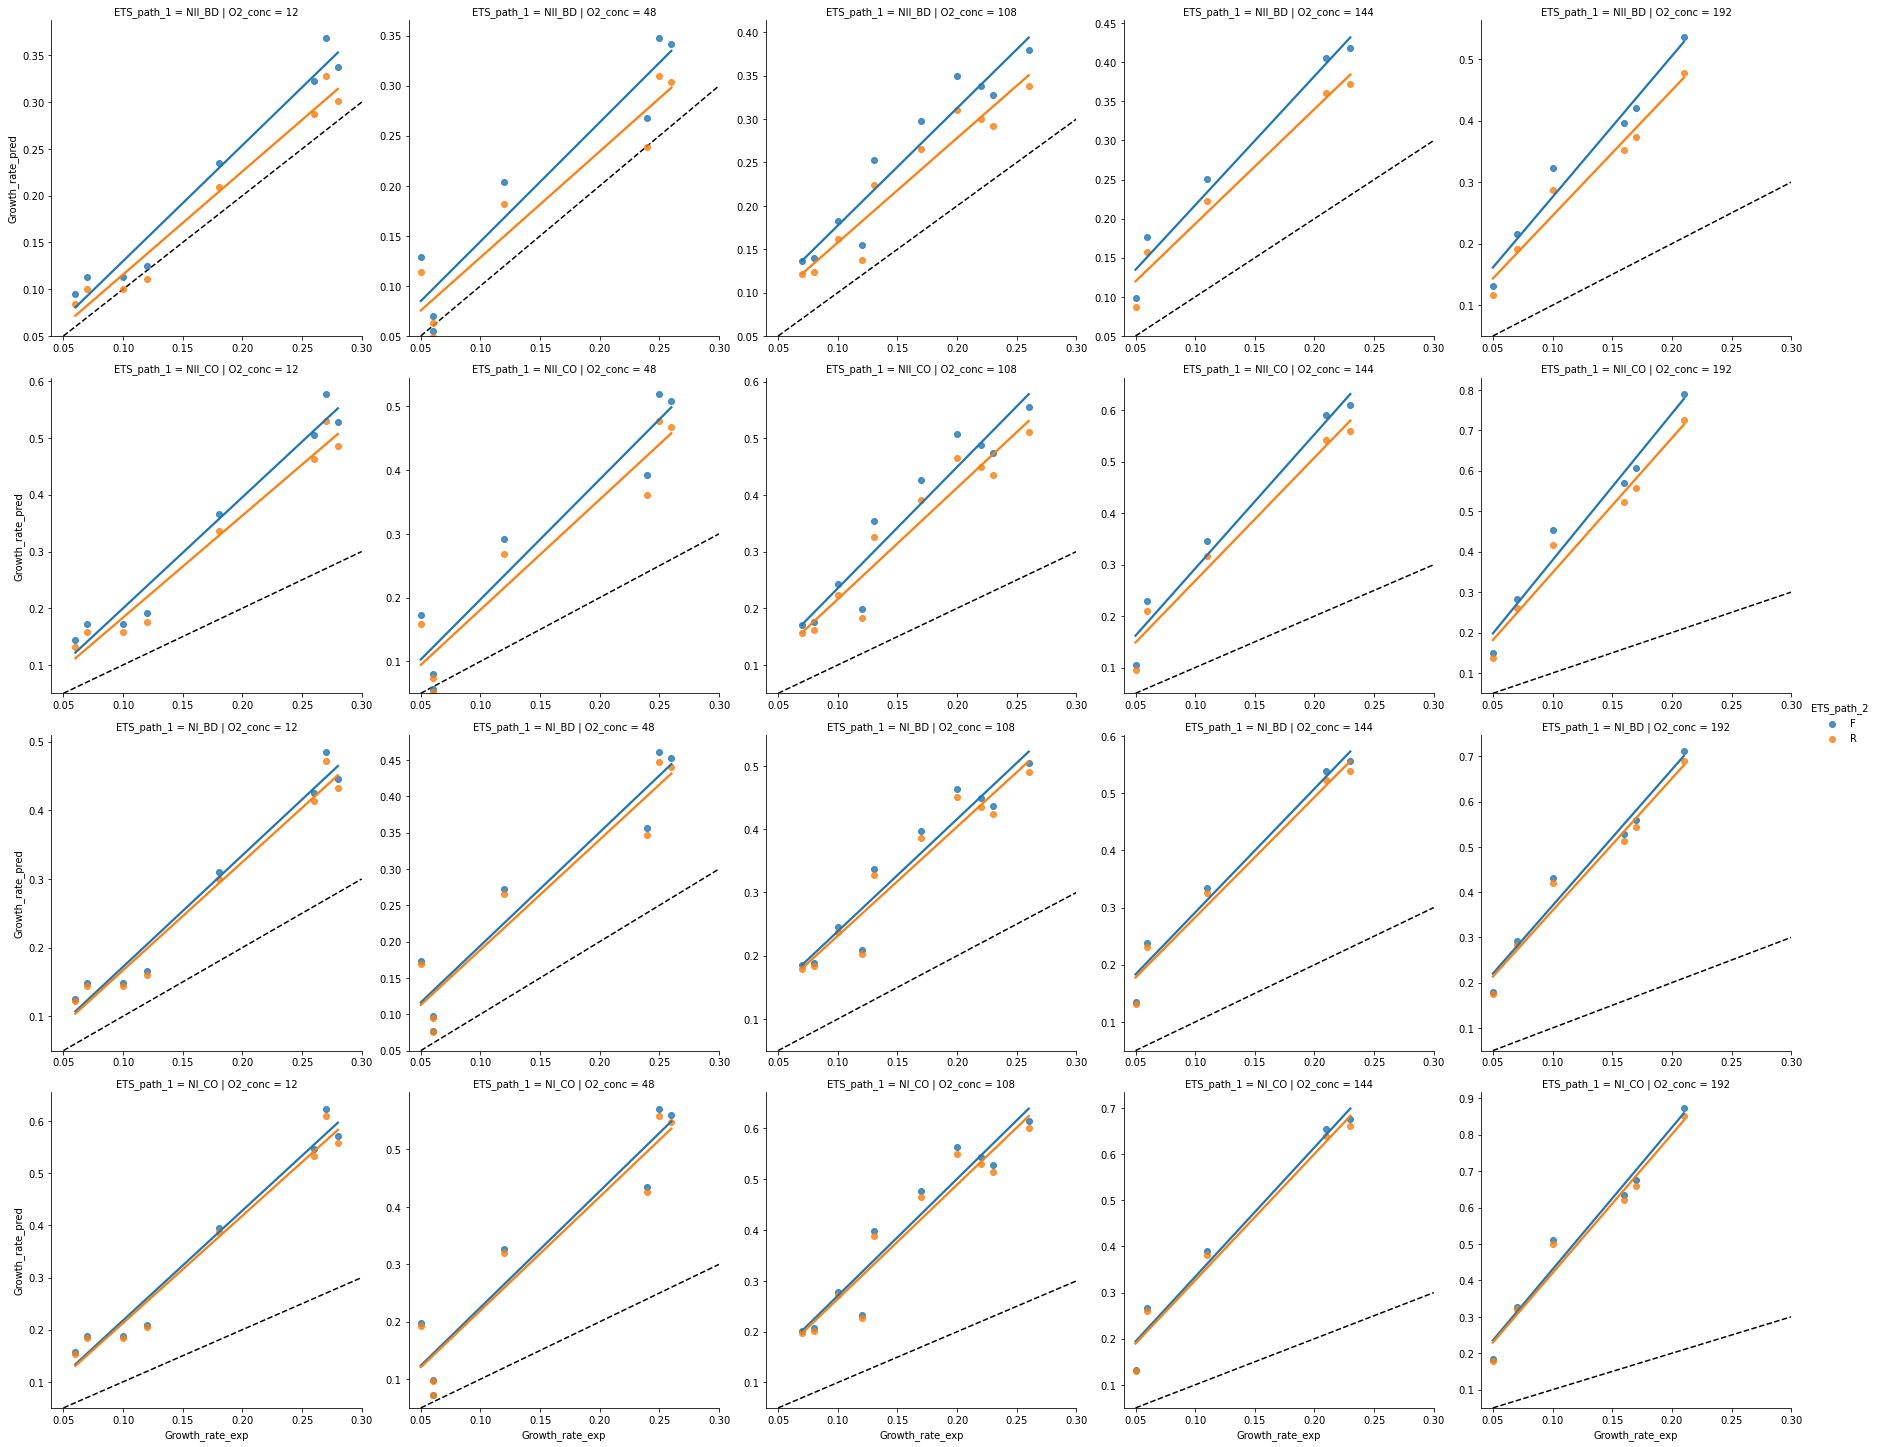

In [57]:
g =sns.lmplot(data = growth_compare, x = 'Growth_rate_exp', y ='Growth_rate_pred', row = 'ETS_path_1', col = 'O2_conc', hue = 'ETS_path_2',
              sharey = False, sharex = False, ci = None)
for ax in g.axes.flat:
    ax.axline((0, 0), slope=1, ls="--", c = 'k', zorder=0)
g.set(ylim=(0.05, None), xlim =(0.04, 0.3))
g.savefig('../Outputs/Maintenance_rates/GR_compare_O2_ETS.tiff', dpi = 60)

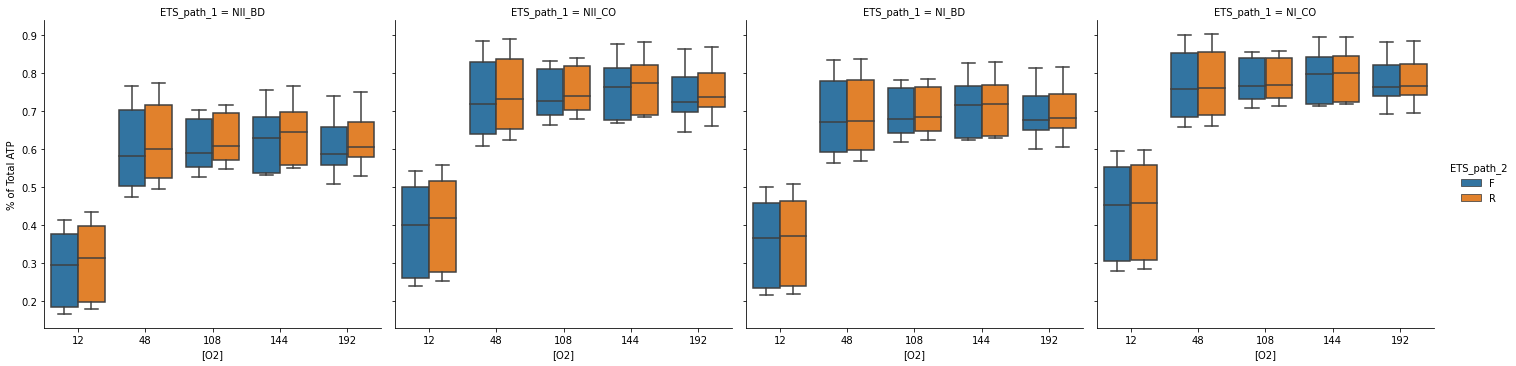

In [58]:
growth_compare['ATPM_ATP_prect'] = pd.to_numeric(growth_compare['ATPM_ATP_prect'])
ax = sns.catplot( x = 'O2_conc', y = 'ATPM_ATP_prect', col= 'ETS_path_1', hue = 'ETS_path_2', data = growth_compare, kind = 'box')
ax.set_axis_labels('[O2]','% of Total ATP')
ax.savefig('../Outputs/Maintenance_rates/prect_ATP_ETS_FR.tiff', dpi = 60)

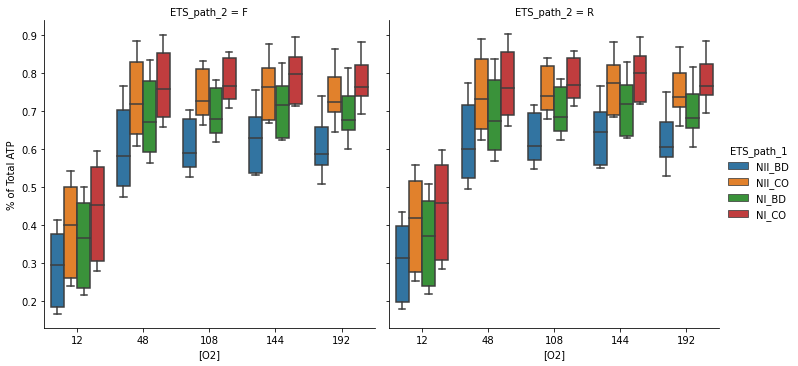

In [59]:
growth_compare['ATPM_ATP_prect'] = pd.to_numeric(growth_compare['ATPM_ATP_prect'])
ax = sns.catplot( x = 'O2_conc', y = 'ATPM_ATP_prect', col= 'ETS_path_2', hue = 'ETS_path_1', data = growth_compare, kind = 'box')
ax.set_axis_labels('[O2]','% of Total ATP')
ax.savefig('../Outputs/Maintenance_rates/prect_ATP_FR_ETS.tiff', dpi = 60)

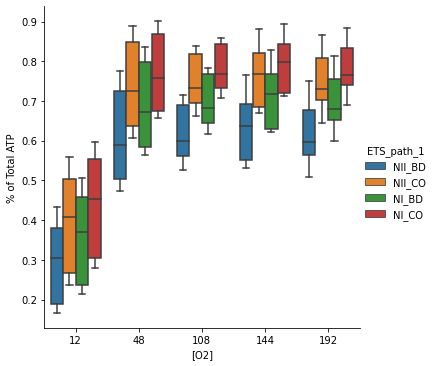

In [60]:
growth_compare['ATPM_ATP_prect'] = pd.to_numeric(growth_compare['ATPM_ATP_prect'])
ax = sns.catplot( x = 'O2_conc', y = 'ATPM_ATP_prect', hue = 'ETS_path_1', data = growth_compare, kind = 'box')
ax.set_axis_labels('[O2]','% of Total ATP')
ax.savefig('../Outputs/Maintenance_rates/prect_ATP_ETS.tiff', dpi = 60)

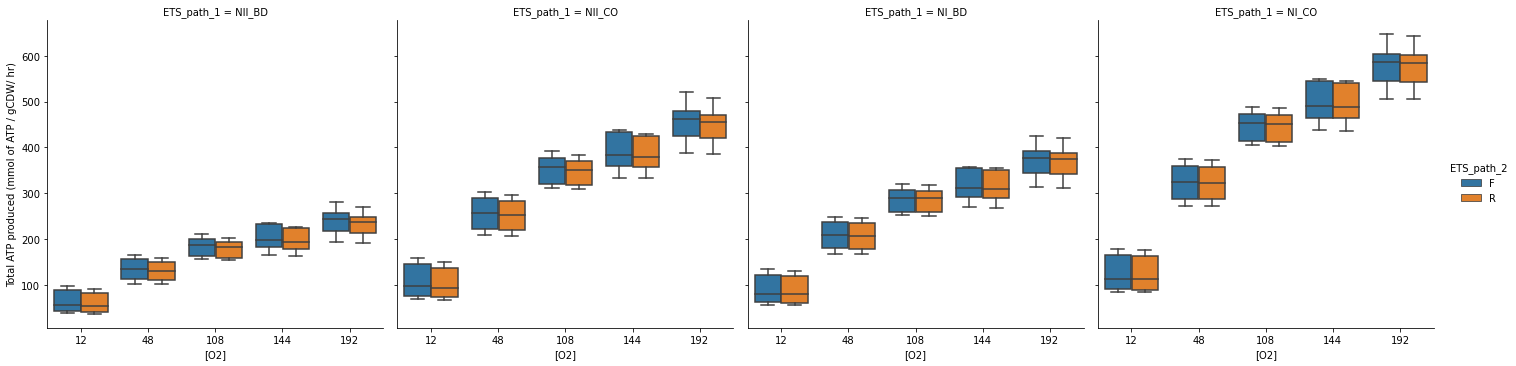

In [61]:

ax = sns.catplot( x = 'O2_conc', y = 'ATP_production', col= 'ETS_path_1', hue = 'ETS_path_2', data = growth_compare, kind = 'box')
ax.set_axis_labels('[O2]','Total ATP produced (mmol of ATP / gCDW/ hr)')
ax.savefig('../Outputs/Maintenance_rates/total_ATP_ETS_FR.tiff', dpi = 30)

TypeError: sequence item 1: expected str instance, list found

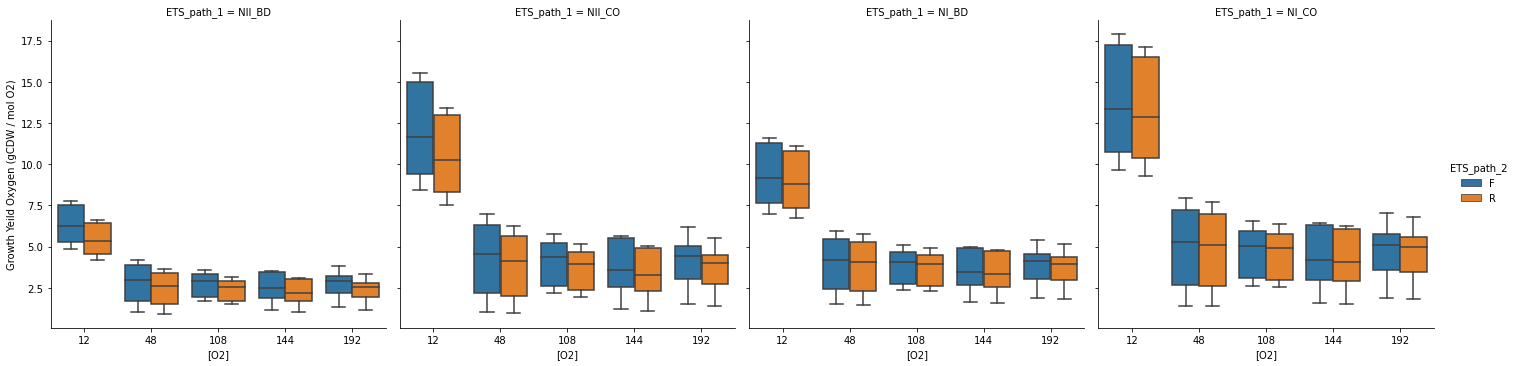

In [62]:

ax = sns.catplot( x = 'O2_conc', y = 'growth_yeild_o2_pred', col= 'ETS_path_1', hue = 'ETS_path_2', data = growth_compare, kind = 'box')
ax.set_axis_labels('[O2]','Growth Yeild Oxygen (gCDW / mol O2)')
g.set_titles(col_template=["NII_BD", "NII_CO", 'NI_BD', "NI_CO"])
ax.savefig('../Outputs/Maintenance_rates/growthyeild_o2_ETS_FR.tiff', dpi = 30)

In [ ]:
ax = sns.catplot( x = 'O2_conc', y = 'growth_yeild_suc_pred', col= 'ETS_path_1', hue = 'ETS_path_2', data = growth_compare, kind = 'box')
ax.set_axis_labels('[O2]','Growth Yeild sucrose (gCDW / mol sucrose)')
ax.savefig('../Outputs/Maintenance_rates/growthyeild_suc_ETS_FR.tiff', dpi = 60)
#add experimental?

In [ ]:
ax = sns.catplot( x = 'O2_conc', y = 'Oxygen_consumption_pred', col= 'ETS_path_1', hue = 'ETS_path_2', data = growth_compare, kind = 'box')
ax.set_axis_labels('[O2]','O2 consumption (mmol O2 / gCDW / hr )')
ax.savefig('../Outputs/Maintenance_rates/o2_consump_ETS_FR.tiff', dpi = 60)

In [ ]:
ax = sns.catplot( x = 'O2_conc', y = 'Oxygen_consumption_pred', hue = 'ETS_path_1', data = growth_compare, kind = 'box')
ax.set_axis_labels('[O2]','O2 consumption (mmol O2 / gCDW / hr )')
ax.savefig('../Outputs/Maintenance_rates/o2_consump_ETS.tiff', dpi = 60)

There are some differences between RNF and FIx but they are very close. we will look at fluxes of rnf vs fix in the NII_BD model. 

In [45]:
#get model fluxes for 12 and 108 O2 concentrations for ~0.2 growth rate

f_12_test = ["NII_BD_F", "NADH6", "CYOO2pp", "RNF", "12", 3.79, 16.25 ]
r_12_test = ["NII_BD_R","NADH6", "CYOO2pp", "FIX", "12", 3.79, 16.25]
f_108_test = ["NII_BD_F", "NADH6", "CYOO2pp", "RNF", "108", 9.97, 110.8 ]
r_108_test = ["NII_BD_R","NADH6", "CYOO2pp", "FIX", "12", 9.97, 110.8]

test_all = [f_12_test, r_12_test, f_108_test, r_108_test]

fluxs_all = []
growth_rates = []

for i in test_all:
    

    model = cobra.io.load_json_model('../Data/Models/iAA1300.json')

    # Make sure glucose is set to zero
    model.reactions.get_by_id("EX_glc__D_e").lower_bound = 0
    model.reactions.get_by_id("EX_glc__D_e").upper_bound = 0

    # Make sure model is diazotrophic
    model.reactions.get_by_id("EX_nh4_e").lower_bound = 0
    model.reactions.get_by_id("EX_nh4_e").upper_bound = 0

    # set the flux to zero of corresponding reactions in pathway of interest
    model.reactions.get_by_id(i[1]).upper_bound = 0
    model.reactions.get_by_id(i[1]).lower_bound = 0

    model.reactions.get_by_id(i[2]).upper_bound = 0
    model.reactions.get_by_id(i[2]).lower_bound = 0

    model.reactions.get_by_id(i[3]).upper_bound = 0
    model.reactions.get_by_id(i[3]).lower_bound = 0

    # Set sucrose uptake to maintenance coefficient
    model.reactions.get_by_id("EX_sucr_e").lower_bound = -i[5]
    model.reactions.get_by_id("EX_sucr_e").upper_bound = -i[5]

    # Set ATPM to theoretical derived
    model.reactions.get_by_id("ATPM").upper_bound = 1000
    model.reactions.get_by_id("ATPM").lower_bound = i[6]
                                 
    solution = model.optimize()
    growth_rates.append(solution.objective_value)
    fluxs_all.append(pd.DataFrame.from_dict([solution.fluxes]).T)
    


In [46]:
growth_rates

[0.23478746016734015,
 0.20894263526369342,
 0.3493227367057295,
 0.31087015087090475]

In [49]:
df = pd.DataFrame([fluxs_all[0], fluxs_all[1], fluxs_all[2], fluxs_all[3]], columns = ["NII_BD_F_12", "NII_BD_R_12", "NII_BD_F_108", "NII_BD_R_108"])

ValueError: Must pass 2-d input. shape=(4, 2289, 1)

In [51]:
dfs = [df.set_index('id') for df in fluxs_all]
print (pd.concat(dfs, axis=1))

KeyError: "None of ['id'] are in the columns"